Este Jupyter Notebook esta enfocado a darles un breve repaso sobre la reducción de dimensiones y técnicas de agregación.

La reducción de dimensiones es una técnica que les permitirá ver los datos de manera mas manejable, no es lo mismo evaluar 91 variables que un resumen en dos variables; aunque esto tiene como contra que se pierde información.


Algoritmos de agrupamiento: en este caso usaremos K-means, este es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. 


In [1]:
#Carga de librerias
import glob #Libreria que permite buscar archivos por atron de nombre
import pandas #Libreria de manejo de datos
import networkx # Libreria de grafos
import numpy # Libreria para calculos
import gc #Libria para limpiar memoria
import matplotlib.pyplot as plt # Libreria para graficos
import folium #Libreria para mapas intereactivos
from folium import plugins #Libreria para mapas intereactivos
from sklearn.decomposition import PCA #Libreria para Analisis de componetes principales
from sklearn.cluster import KMeans #Libreria algoritmos de agrupación 

pandas.options.display.float_format = '{:.2f}'.format # Configuramos separadores de miles y 2 decimales para los numeros
#Carga de Datos



NO
../../Datos/Agregacion/EstadisticasRNDC_201909.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201903.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201906.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201904.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201910.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201912.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201908.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201902.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201911.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201905.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201901.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542918 entries, 0 to 1542917
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   CODMERCANCIA            1542918 non-null  object
 1   CODMUNICIPIODESTINO     1542918 non-null  int64 
 2   CODMUNICIPIOORIGEN      1542918 non-null  int64 
 3   CODOPERACIONTRANSPORTE  1542918 non-n

In [ ]:
def SufijoColumna(Data,suf):
    """Le pone sufijos a el nombre de una columna
    Data: str 
    suf : str
    """
    i=Data
    final=[]
    for c in i:
        final.append(c+suf)
    return final

En el proximo paso se cargan las bases de datos de RNDC (Registro Nacional de cargas del ministerio de trasporte), Ese registo muestra todos los caminoes de carga desde donde salen hasta donde y con que ademas del peso que llevan. Tome el 2019 por que es el utrimo año prepandemia, si se fijan intuitivamente esos registros deberian hablar de la recuperacion de la economica del municpio a un nivel muy grueso ademas de dar ideas de a donde diversicificar, crecer, recuperar con datos de origen diferente a los que normalemte se usarian.

En la proxima ventana veran la carga de estas bases de datosde RNDC del 2019, solo usare ese año.

Por hacerlo mas pedagojico use un codigo menos limpio (Deberia ser una funcion) que tiene la ventaja que una vez termina limpia memoria de las cosas que no se asignaron a la salida.

In [9]:
a=glob.glob("../../Datos/Agregacion/EstadisticasRNDC_2019*")#Busca en los archivos de RNDC 
municipios=pandas.read_excel("../../Datos/Agregacion/Municipios_Dane_Ubicados.xlsx", header=0)# Busca en un archivo armado por mi que tiene el centro geografico de todos los municipios.
municipios_ori=pandas.read_excel("../../Datos/Agregacion/Municipios_Dane_Ubicados.xlsx", header=0) #Origen de los cargamentos
NameMunicipios=municipios_ori.columns
municipios_ori.columns =SufijoColumna(NameMunicipios,"_Ori")
municipios_dest=pandas.read_excel("../../Datos/Agregacion/Municipios_Dane_Ubicados.xlsx", header=0)# destino de los cargamentos
NameMunicipios=municipios_dest.columns
municipios_dest.columns =SufijoColumna(NameMunicipios,"_Dest")
#Carga de datos
for b in a:
    A1=pandas.read_excel(b, header=0)
    A1["Tiempo"]=str(A1["MES"])
    try:
        A2=A2.append(A1,ignore_index=True,sort=True)
        print(b)
    except:
        A2=A1
        print("NO")
#Marcar posiciones de todos los municipios con el centroide ya determinado        
pos={}
for er in municipios.Id:
    pos[int(er)]=(municipios.Long2.loc[municipios['Id'] == er].values[0],municipios.lat.loc[municipios['Id'] == er].values[0])
A2.info()
municipios.info()

['EstadisticasRNDC_201907.xlsx',
 'EstadisticasRNDC_201510.xlsx',
 'EstadisticasRNDC_201802.xlsx',
 'Municipios_Dane_Ubicados.xlsx',
 'EstadisticasRNDC_201804.xlsx',
 'EstadisticasRNDC_201909.xlsx',
 'EstadisticasRNDC_201511.xlsx',
 'EstadisticasRNDC_201801.xlsx',
 'EstadisticasRNDC_201807.xlsx',
 'EstadisticasRNDC_201903.xlsx',
 'EstadisticasRNDC_201810.xlsx',
 'EstadisticasRNDC_201507.xlsx',
 'EstadisticasRNDC_201906.xlsx',
 'EstadisticasRNDC_201705.xlsx',
 'EstadisticasRNDC_201612.xlsx',
 'EstadisticasRNDC_201702.xlsx',
 'EstadisticasRNDC_201707.xlsx',
 'EstadisticasRNDC_201803.xlsx',
 'EstadisticasRNDC_201606.xlsx',
 'EstadisticasRNDC_201709.xlsx',
 'EstadisticasRNDC_201509.xlsx',
 'EstadisticasRNDC_201806.xlsx',
 'EstadisticasRNDC_201503.xlsx',
 'EstadisticasRNDC_201601.xlsx',
 'EstadisticasRNDC_201703.xlsx',
 'EstadisticasRNDC_201508.xlsx',
 'EstadisticasRNDC_201604.xlsx',
 'EstadisticasRNDC_201501.xlsx',
 'EstadisticasRNDC_201607.xlsx',
 'EstadisticasRNDC_201712.xlsx',
 'Estadis

Ya con los datos cargados se puede hacer un poco de exploracion de esos datos.
Al  llamar la base de datos con el comando A2.info, se pueden ver varias cosas interesantes tiene 1542918 entradas.
tiene  10 variables numericas que son CODMUNICIPIODESTINO, CODMUNICIPIOORIGEN, GALONES,           KILOGRAMOS, KILOMETROS, MES, VALORESPAGADOS, VIAJESLIQUIDOS, VIAJESTOTALES y VIAJESVALORCERO.
Y 14 son objetos cadenas de caracteres es geeralemte lo que implica un objeto.


In [3]:
A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542918 entries, 0 to 1542917
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   CODMERCANCIA            1542918 non-null  object
 1   CODMUNICIPIODESTINO     1542918 non-null  int64 
 2   CODMUNICIPIOORIGEN      1542918 non-null  int64 
 3   CODOPERACIONTRANSPORTE  1542918 non-null  object
 4   CODTIPOCONTENEDOR       1542918 non-null  object
 5   COD_CONFIG_VEHICULO     1542172 non-null  object
 6   CONFIG_VEHICULO         1542172 non-null  object
 7   DEPARTAMENTODESTINO     1542918 non-null  object
 8   DEPARTAMENTOORIGEN      1542918 non-null  object
 9   GALONES                 1542918 non-null  int64 
 10  KILOGRAMOS              1542918 non-null  int64 
 11  KILOMETROS              1542918 non-null  int64 
 12  MERCANCIA               1542918 non-null  object
 13  MES                     1542918 non-null  int64 
 14  MUNICIPIODESTINO  

In [2]:
A2

,CODMERCANCIA,CODMUNICIPIODESTINO,CODMUNICIPIOORIGEN,CODOPERACIONTRANSPORTE,CODTIPOCONTENEDOR,COD_CONFIG_VEHICULO,CONFIG_VEHICULO,DEPARTAMENTODESTINO,DEPARTAMENTOORIGEN,GALONES,...,MUNICIPIODESTINO,MUNICIPIOORIGEN,NATURALEZACARGA,OPERACIONTRANSPORTE,TIPOCONTENEDOR,Tiempo,VALORESPAGADOS,VIAJESLIQUIDOS,VIAJESTOTALES,VIAJESVALORCERO
0,001601,5400000,5001000,G,.,CA,Camioneta de 2 ejes,ANTIOQUIA,ANTIOQUIA,0,...,LA UNION ANTIOQUIA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,1162500,0,3,0
1,009980,25899000,5001000,G,.,CA,Camioneta de 2 ejes,CUNDINAMARCA,ANTIOQUIA,0,...,ZIPAQUIRA CUNDINAMARCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,574500,0,1,0
2,009800,76834000,5001000,G,.,CA,Camioneta de 2 ejes,VALLE DEL CAUCA,ANTIOQUIA,0,...,TULUA VALLE DEL CAUCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,2400000,0,3,0
3,009890,76109000,5001000,G,.,CA,Camioneta de 2 ejes,VALLE DEL CAUCA,ANTIOQUIA,0,...,BUENAVENTURA VALLE DEL CAUCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,1400000,0,1,0
4,002710,5380000,5001000,G,.,CA,Camioneta de 2 ejes,ANTIOQUIA,ANTIOQUIA,0,...,LA ESTRELLA LA ESTRELLA ANTIOQUIA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,80000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542913,002202,20001000,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,CESAR,ATLANTICO,0,...,VALLEDUPAR CESAR,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,4400000,0,3,0
1542914,002202,23001000,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,CORDOBA,ATLANTICO,0,...,MONTERIA CORDOBA,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,2200000,0,1,0
1542915,002202,70771013,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,SUCRE,ATLANTICO,0,...,MONTERIA SUCRE SUCRE,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,1500000,0,1,0
1542916,007010,8001000,20001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,ATLANTICO,CESAR,0,...,BARRANQUILLA ATLANTICO,VALLEDUPAR CESAR,Carga Normal,General,.,0 201901\n1 201901\n2 ...,3200000,0,3,0


Al obsevar la base de datos anterior se detectan varios problemas, en codigos dane, datos que no entidne como numeros y cosas por el estilo.
En la siguiente seccion de arreglan esos problemas

In [4]:
#Cambios en la base de datos
def CodigoDane(Completo):
    """
    Recibe un codigo dane y si no cumple con los parametros se devuelve un numero que marca el error, si cumple devuelve el numero en un formato
    Completo: int
    """
    Completo=str(Completo)
    Tam=len(Completo)
    if Tam<6:
        Cortado=99999
    else:
        Cortado=int(Completo[:Tam-3])       
    return Cortado
def BuscadorGuacari(num):
    """
    Compara respecto al numero dane
    Num: int
    """
    if num==76318:
        Temp=1
    else:
        return 0
    return Temp
def TemporizadorAge(Texto):
    """Saca del texto en formato AAAAMM el año
    Texto: str
    """
    Salida=str(Texto)[:4]
    return Salida
def TemporizadorMes(Texto):
    """Saca del texto en formato AAAAMM el mes
    Texto: str
    """
    Salida=str(Texto)[4:]
    return Salida
def ConvInteger(temp):
    """Convierte a integer
    Texto: str
    """
    try:
        final=int(temp)
    except:
        final=0
    return final




Aqui ya llegamos a las primeras adaptaciones a la base de datos.   Nuestra base principal que es la de RNDC puede ser enriquesida con los datos de los municipios de DANE, ademas se pueden hacer otros  

In [ ]:
A2["CODMUNICIPIOORIGEN2"]=A2["CODMUNICIPIOORIGEN"].apply(CodigoDane)#Codigo dane al formato antes dicho.
A2["CODMUNICIPIODESTINO2" ]=A2["CODMUNICIPIODESTINO" ].apply(CodigoDane)#Codigo dane al formato antes dicho.
#Estos dos comandos los uso para unir las bases de datos. El comanod merge de pandas toma una tabla y con una columna de referencia le une otra.
A3=pandas.merge(A2, municipios_ori, left_on='CODMUNICIPIOORIGEN2', right_on='Id_Ori',how="left")
A4=pandas.merge(A3, municipios_dest, left_on='CODMUNICIPIODESTINO2', right_on='Id_Dest',how="left")
#Crear una columna que diga la ruta de origen a destino.
A4["Recorrido"]=A4["NOMBRE_DPT_Ori"]+"/"+A4["label_Ori"]+"_"+A4["NOMBRE_DPT_Dest"]+"/"+A4["label_Dest"]
#Otras adecuaciones del la base de datos
A4["Age"]=A4["MES"].apply(TemporizadorAge)
A4["MesF"]=A4["MES"].apply(TemporizadorMes)
A4["Id_Ori2"]=A4["Id_Ori"].apply(ConvInteger)
A4["Id_Dest2"]=A4["Id_Dest"].apply(ConvInteger)
A4["Guacari_origen"]=A4["Id_Ori2"].apply(BuscadorGuacari)
A4["Guacari_destino"]=A4["Id_Dest2"].apply(BuscadorGuacari)
A4["DateComplete"]=A4["Age"]+"/"+A4["MesF"] +"/"+"01"
A4['DateComplete'] = pandas.to_datetime(A4['DateComplete'], format='%Y/%m/%d')

Aunque se genero mucha informacion y la dejo para que miren ejemplos de como hacer ciertos calculos y si quieren usarla para algo la tengan disponible.
Pero para nuestro ejemplo solo nenesitamos "CODMERCANCIA","MERCANCIA","KILOGRAMOS","GALONES","MUNICIPIOORIGEN","Guacari_origen",'DateComplete',"DEPARTAMENTODESTINO"

In [5]:
#Filtrado de informacion
A4=A4[["CODMERCANCIA","MERCANCIA","KILOGRAMOS","GALONES","MUNICIPIOORIGEN","Guacari_origen",'DateComplete',"DEPARTAMENTODESTINO"]]

In [6]:
A4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543195 entries, 0 to 1543194
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   CODMERCANCIA         1543195 non-null  object        
 1   MERCANCIA            1543195 non-null  object        
 2   KILOGRAMOS           1543195 non-null  int64         
 3   GALONES              1543195 non-null  int64         
 4   MUNICIPIOORIGEN      1543195 non-null  object        
 5   Guacari_origen       1543195 non-null  int64         
 6   DateComplete         1543195 non-null  datetime64[ns]
 7   DEPARTAMENTODESTINO  1543195 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 106.0+ MB


Nunca esta de mas Verificar los datos y un nuevo tipo de informacion encotramos, datetime64 que permite trabajar con fechas. 

In [7]:
numpy.sort(A4['DateComplete'].unique())

array(['2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

Cambios a la base de datos, marcar viajes que salen de Guacari. Asumir que el cargamante liquido tiene una densidad de 1. Totalizar los pesos. Generar una tabla con esa informacion.

In [8]:
A4G = A4[A4['Guacari_origen'] == 1]
A4G['GALONES']=A4G['GALONES']*3.78541
A4G["PesoTotal"]=A4G['GALONES']+A4G["KILOGRAMOS"]
table = pandas.pivot_table(A4G, values=["PesoTotal",'GALONES',"PesoTotal"], index=['DateComplete','MERCANCIA'],aggfunc=numpy.sum)

Gereneramos una tabla con los 50 productos que mas pero representan para Guacari en la bases de datos, y los codigos los transformamos en una lista para poder usarlos en operaciones.

In [9]:
table2 = pandas.pivot_table(A4G, values=["PesoTotal"], index=['MERCANCIA',"CODMERCANCIA"],aggfunc=numpy.sum)
table2=table2.sort_values(by=["PesoTotal"], ascending=False)
Codigos=[i[1] for i in table2.index]

CodigosGua=['001701',
 '001703',
 '001702',
 '000409',
 '001005',
 '002940',
 '001704',
 '000105',
 '001102',
 '003105',
 '003101',
 '009800',
 '002302',
 '001105',
 '001208',
 '001904',
 '001517',
 '000306',
 '003103',
 '008701',
 '000207',
 '008517',
 '006902',
 '002309',
 '001212',
 '002505',
 '007326',
 '008531',
 '008716',
 '001207',
 '008530',
 '001001',
 '002303',
 '008423',
 '001511',
 '000901',
 '002508',
 '009304',
 '001106',
 '001006',
 '009602',
 '003802',
 '008430',
 '001008',
 '003102',
 '008703',
 '008480',
 '006903',
 '008509',
 '002403',
 '003917',
 '008536',
 '008525',
 '002839',
 '006502',
 '006908',
 '006801',
 '002301',
 '002402',
 '008537',
 '003923',
 '005203',
 '002101',
 '008113',
 '002931',
 '001201',
 '009403',
 '008426',
 '008432',
 '008710',
 '007207',
 '008501',
 '009503',
 '006307',
 '008428',
 '001209']
table2[:50]

,,PesoTotal
MERCANCIA,CODMERCANCIA,
AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO,001701,93875731.79
MELAZA DE LA EXTRACCION O DEL REFINADO DEL AZUCAR,001703,17273690.00
LOS DEMAS AZUCARES; INCLUIDAS LA LACTOSA; LAMALTOSA; LA GLUCOSA Y LA FRUCTO,001702,3776500.00
MIEL NATURAL,000409,3318500.00
MAIZ,001005,2769928.08
PRODUCTOS VARIOS,009980,2735600.00
AZUCARES QUIMICAMENTE PUROS; CON EXCEPCION DE LA SACAROSA; LACTOSA; MALTOSA,002940,1730500.00
ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL CHOCOLATE BLANCO),001704,1338000.00
GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS,000105,755000.00


Noten que es la misma operacion que el anterior pero solo usando la base de datos de colombia sin filtrar al municipio. Basicamente a nivel nacional, y esas dos listas las fusionamos en pasos posterioes  con para tener mapaeado respescto a lo que sale de Guacari y lo que mas se produce en el pais.

In [10]:
A4['GALONES']=A4['GALONES']*3.78541
A4["PesoTotal"]=A4['GALONES']+A4["KILOGRAMOS"]
table2 = pandas.pivot_table(A4, values=["PesoTotal"], index=['MERCANCIA',"CODMERCANCIA"],aggfunc=numpy.sum)
table2=table2.sort_values(by=["PesoTotal"], ascending=False)[:50]
Codigos=[i[1] for i in table2.index]
CodigosNac=[
 '002709',
 '003816',
 '001005',
 '002523',
 '007010',
 '002203',
 '002202',
 '002701',
 '001006',
 '003802',
 '001701',
 '002517',
 '002309',
 '000901',
 '001511',
 '003105',
 '002704',
 '004415',
 '001001',
 '003101',
 '002304',
 '002601',
 '001201',
 '002201',
 '002515',
 '000207',
 '000401',
 '001101',
 '002106',
 '004808',
 '002501',
 '004402',
 '002520']

In [11]:
CodigosTot=CodigosNac+CodigosGua# Fusiona las dos listas
CodigosTot=set(CodigosTot)#Se convierte en un set para eliminar repetidos
len(CodigosTot)

In [12]:
def BuscadorCod(num):
    """Devuelve un 1 si esta entre los valores evaluados
    num: int
    """
    if num in CodigosTot:
        Temp=1
    else:
        return 0
    return Temp
A4["MercanciasEval"]=A4["CODMERCANCIA"].apply(BuscadorCod) 
A4T = A4[A4["MercanciasEval"] == 1]

Entonces aqui podemos ver que en venta de esos productos que dijimos hay 1541 municipios de colombia, ademas que Guacari tiene 899 viajes celdas de viajes de los 450629 que se realiazaron en colombia.

In [13]:
len(A4T["MUNICIPIOORIGEN"].unique())

1541

In [14]:
A4T[A4T["MUNICIPIOORIGEN"]=='GUACARI VALLE DEL CAUCA']

,CODMERCANCIA,MERCANCIA,KILOGRAMOS,GALONES,MUNICIPIOORIGEN,Guacari_origen,DateComplete,DEPARTAMENTODESTINO,PesoTotal,MercanciasEval
67703,003923,ARTICULOS PARA EL TRANSPORTE O ENVASADO; DE P...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,CUNDINAMARCA,10000.00,1
67704,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,30000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,VALLE DEL CAUCA,30000.00,1
67705,001704,ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,TOLIMA,10000.00,1
67708,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,QUINDIO,10000.00,1
67709,003105,ABONOS MINERALES O QUIMICOS; CON DOS O TRES D...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,NARINO,10000.00,1
...,...,...,...,...,...,...,...,...,...,...
1539496,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,2279300,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ATLANTICO,2279300.00,1
1539497,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,68000,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,CUNDINAMARCA,68000.00,1
1539498,001703,MELAZA DE LA EXTRACCION O DEL REFINADO DEL AZUCAR,172500,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ANTIOQUIA,172500.00,1
1539499,001102,HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MOR...,69000,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ANTIOQUIA,69000.00,1


In [15]:
A4T

,CODMERCANCIA,MERCANCIA,KILOGRAMOS,GALONES,MUNICIPIOORIGEN,Guacari_origen,DateComplete,DEPARTAMENTODESTINO,PesoTotal,MercanciasEval
2,009800,CONJUNTOS INDUSTRIALES EXPORTADOS DE CONFORMID...,3600,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,VALLE DEL CAUCA,3600.00,1
11,006902,LADRILLOS; PLACAS; BALDOSAS Y PIEZAS CERAMIC...,1000,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,ANTIOQUIA,1000.00,1
18,006307,LOS DEMAS ARTICULOS CONFECCIONADOS; INCLUIDOS...,2001,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,ANTIOQUIA,2001.00,1
26,001904,PRODUCTOS A BASE DE CEREALES OBTENIDOS PORINSU...,800,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,BOGOTA D. C.,800.00,1
31,002201,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTI...,1000,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,SANTANDER,1000.00,1
...,...,...,...,...,...,...,...,...,...,...
1543190,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,84000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,CESAR,84000.00,1
1543191,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,28000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,CORDOBA,28000.00,1
1543192,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,28000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,SUCRE,28000.00,1
1543193,007010,BOMBONAS; (DAMAJUANAS) BOTELLAS; FRASCOS; B...,76000,0.00,VALLEDUPAR CESAR,0,2019-01-01,ATLANTICO,76000.00,1


In [16]:
#list(A4T["MUNICIPIOORIGEN"].unique())

LBOA CAUCA',
 'BOLIVAR CAUCA',
 'CALOTO CAUCA',
 'MOSQUERA EL TAMBO CAUCA',
 'GUACHENE CAUCA',
 'CANDELARIA LOPEZ CAUCA',
 'MERCADERES CAUCA',
 'MOJARRAS MERCADERES CAUCA',
 'MIRANDA CAUCA',
 'ORTIGAL MIRANDA CAUCA',
 'PATIA CAUCA',
 'EL ESTRECHO PATIA CAUCA',
 'LA FLORIDA PATIA CAUCA',
 'PIENDAMO CAUCA',
 'PUERTO TEJADA CAUCA',
 'SANTANDER DE QUILICHAO CAUCA',
 'SUCRE CAUCA',
 'TIMBIO CAUCA',
 'BADILLO VALLEDUPAR CESAR',
 'CARACOLI VALLEDUPAR CESAR',
 'AGUSTIN CODAZZI CESAR',
 'CURUMANI CESAR',
 'LA LOMA EL PASO CESAR',
 'CUATRO VIENTOS EL PASO CESAR',
 'LA GLORIA CESAR',
 'LA JAGUA DE IBIRICO CESAR',
 'PAILITAS CESAR',
 'PELAYA CESAR',
 'PUEBLO BELLO CESAR',
 'LA PAZ CESAR',
 'SAN ALBERTO CESAR',
 'SAN MARTIN CESAR',
 'SANTA LUCIA MONTERIA CORDOBA',
 'CIENAGA DE ORO CORDOBA',
 'LORICA CORDOBA',
 'LA DOCTRINA LORICA CORDOBA',
 'MONTELIBANO CORDOBA',
 'PLANETA RICA CORDOBA',
 'PAMPLONA PLANETA RICA CORDOBA',
 'PUEBLO NUEVO CORDOBA',
 'NEIVA PUEBLO NUEVO CORDOBA',
 'PUERTO LIBERTADOR CO

Aqui ya tenemos los primeros datos para responder nuestra pregunta, ¿Que municipios son mas similares a guacari en salidas de trasporte?

In [17]:
A5=A4T.pivot_table(index="MUNICIPIOORIGEN",columns="MERCANCIA", values="PesoTotal",fill_value=0)

In [18]:
A5

Aqui iniciamos con calculos, este seria el calculo de un pca (Analisis de componentes princiales) que es una forma de resumir informacion pero lo unico que deben tomar en cuenta aca es que los datos de Pesos fue dividido entre el mayor de los pesos registrados esto es como una forma de hacer que los datos esten entre 0 y 1 para darle una imporancia similar a los distintos rublos.

Por otro lado Para evaluar los grupos idoneos de kmeans se utilizo un metodo denominado grafica de codo, que te permite ver donde ya aumqntar los grupos no te da mucha mas informacion.

In [19]:
pca = PCA(n_components=2).fit_transform(A5/A5.max())

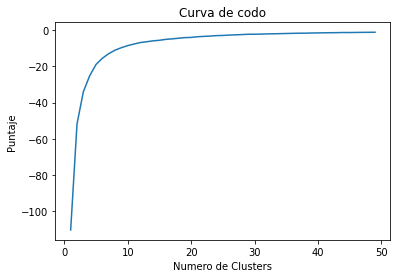

In [20]:
Nc = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(pca).score(pca) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Puntaje')
plt.title('Curva de codo')
plt.show()

In [22]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)#El numero elegido de grupos fue 10
kmeans.fit(pca)#entrenamineto del modelo

KMeans(n_clusters=10)

En el paso anterior se puede ver el entrenaminto del modelo de kmeans, y se proede a ver en que grupo que se ubica Guacari.

In [23]:
A5["GroupPCA"]=kmeans.labels_

In [31]:
GrupoNew=A5.loc['GUACARI VALLE DEL CAUCA']["GroupPCA"]

In [32]:
A5[A5["GroupPCA"]==GrupoNew]

MERCANCIA,ABONOS DE ORIGEN ANIMAL O VEGETAL; INCLUSO MEZCLADOS ENTRE SI O TRATADOS QUIM,ABONOS MINERALES O QUIMICOS FOSFATADOS,ABONOS MINERALES O QUIMICOS NITROGENADOS,ABONOS MINERALES O QUIMICOS; CON DOS O TRES DE LOS ELEMENTOS FERTILIZANTES NI,ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI,ACEITES CRUDOS DE PETROLEO O DE MINERALES BITUMINOSOS,ADOQUINES; ENCINTADO ( BORDILLOS ) Y LOSAS PARA PAVIMENTOS; DE PIEDRA NATURA,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTIFICIAL Y LA GASIFICADA; SIN AZU,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICADA; AZUCARADA; EDULCORADA DE OT,ALFORFON; MIJO Y ALPISTE; LOS DEMAS CEREALES,ALGARROBAS; ALGAS; REMOLACHA AZUCARERA Y CA?A DE AZUCAR; FRESCAS; REFRIGER,ALGODON CARDADO O PEINADO,APARATOS E INSTRUMENTOS PARA PESAR; INCLUIDAS LAS BASCULAS Y BALANZAS PARA L,APARATOS ELECTRICOS DE SE?ALIZACION (EXCEPTO LOS DE TRANSMISION DE MENSAJES),APARATOS ELECTRICOS DE SE?ALIZACION ACUSTICA O VISUAL (POR EJEMPLO SONERIAS;,APARATOS ELECTRICOS DE TELEFONIA O TELEGRAFIA CON HILOS; INCLUIDOS LOS TELEFO,APARATOS ELECTROMECANICOS CON MOTOR ELECTRICO INCORPORADO; DE USO DOMESTICO,APARATOS EMISORES DE RADIOTELEFONIA; RADIOTELEGRAFIA; RADIODIFUSION O TELEVI,APARATOS PARA EL CORTE; SECCIONAMIENTO; PROTECCION; DERIVACION; EMPALME O,ARENAS NATURALES DE CUALQUIER CLASE; INCLUSO COLOREADAS; CON EXCLUSION DE LA,ARROZ,ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL CHOCOLATE BLANCO),ARTICULOS PARA EL TRANSPORTE O ENVASADO; DE PLASTICO; TAPONES; TAPAS; CAPSU,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO,AZUCARES QUIMICAMENTE PUROS; CON EXCEPCION DE LA SACAROSA; LACTOSA; MALTOSA,BOMBONAS; (DAMAJUANAS) BOTELLAS; FRASCOS; BOCALES; TARROS; ENVASES TUBULA,CAFE; INCLUSO TOSTADO O DESCAFEINADO; CASCARA O CASCARILLA DE CAFE; SUCEDANEO,CAJAS DE FUNDICION; PLACAS DE FONDO PARA MOLDES; MODELOS PARA MOLDES; MOLDES P,CAJONES; CAJAS; JAULAS; TAMBORES Y ENVASES SIMILARES; DE MADERA; CARRETES,CANTOS; GRAVA; PIEDRAS MACHACADAS; DE LOS TIPOS GENERALMENTE UTILIZADOS PAR,CARBON VEGETAL (INCLUIDO EL DE CASCARAS O DE HUESOS DE FRUTAS); AUNQUE ESTE A,CARBONES ACTIVADOS; MATERIAS MINERALES NATURALES ACTIVADAS; NEGRO DE ORIGEN AN,CARNE Y DESPOJOS COMESTIBLES DE AVES DE LA PARTIDA 0 1;0 5; FRESCOS; REFRIGERD,CARROS Y AUTOMOVILES BLINDADOS DE COMBATE; INCLUSO ARMADOS; PARTES,CASCOS PARA SOMBREROS; TRENZADOS O FABRICADOS POR UNION DE TIRAS DE CUALQUIE,CEMENTOS HIDRAULICOS (INCLUIDOS LOS CEMENTOS SIN PULVERIZAR O CLINKER); AUNQU,CEMENTOS; MORTEROS; HORMIGONES Y PREPARACIONES SIMILARES; REFRACTARIOS; EX,CERVEZA DE MALTA,CIGARROS O PUROS (INCLUSO DESPUNTADOS); PURITOS Y CIGARRILLOS; DE TABACO O D,COCHES DE TURISMO Y DEMAS VEHICULOS AUTOMOVILES PROYECTADOS PRINCIPALMENTE PAR,CONJUNTOS INDUSTRIALES EXPORTADOS DE CONFORMIDAD CON EL REGLAMNETO (CEE) N? 518/,"COQUES Y SEMICOQUES DE HULLA, DE LIGNITO O DE TURBA, INCLUSO ALGOMERADOS; CARBON DE RETORTA.",CRUSTACEOS; INCLUSO PELADOS; VIVOS; FRESCOS; REFRIGERADOS; CONGELADOS; SECOS;,CUADROS; PANELES; ARMARIOS Y DEMAS SOPORTES EQUIPADOS CON VARIOS APARATOS D,EXTRACTOS; ESENCIAS Y CONCENTRADOS DE CAFE; TE O YERBA MATE Y PREPARACIONES,GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS,GRUAS Y APARATOS DE ELEVACION SOBRE CABLE AEREO; PUENTES RODANTES; PORTICOS D,HABAS(POROTOS; FRIJOLES) DE SOJA (SOYA) INCLUSO QUEBRANTADAS,HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MORCAJO O TRANQUILLON,HARINA DE SEMILLAS O DE FRUTOS OLEAGINOSOS; EXCEPTO LA HARINA DE MOSTAZA,HARINA DE TRIGO O MORCAJO,HARINA; POLVO Y <PELLETS>; DE CARNE; DE DESPOJOS; DE PESCADO O DE CRUSTACE,HARINA; SEMOLA Y POLVO DE LAS LEGUMBRES SECAS DE LA PARTIDA 0713; DE SAGU O,HARINA; SEMOLA; POLVO; COPOS; GRANULOS Y <PELLETS> DE PATATAS (PAPAS),"HULLAS: BRIQUETAS, OVOIDES Y COMBUSTIBLES SOLIDOS SIMILARES, OBTENIDOS DE LA HULLA (CARBON)",LADRILLOS; PLACAS; BALDOSAS Y PIEZAS CERAMICAS ANALOGAS DE CONSTRUCCION; RE,LAS DEMAS ARCILLAS (CON EXCLUSION DE LAS ARCILLAS DILATADAS DE LA PARTI

La competencia mas cercana a nivel de lo que produce Guacari son,YUMBO VALLE DEL CAUCA	, SANTA MARTA MAGDALENA	, PALMIRA VALLE DEL CAUCA,GUADALAJARA DE BUGA VALLE DEL CAUCA,CARTAGENA BOLIVAR,CALI VALLE DEL CAUCA, BARRANQUILLA ATLANTICO

Ya viendo quien es nuestra competencia, podriamos continuar con que producimos. Como predento compararlo con respecto a Guacari, pueden ver que estoy dividiendo entre el peso en mercansia que sale de Guacari. Esto hara que si un numero es menor o cercano a 1 es que Guacari es el mayor o de los mayores, pero si el numero es mayor indica que guacari produce poco en comparacion con los otros.

In [33]:
A6=A5[A5["GroupPCA"]==GrupoNew]
A7=A6/A6.loc['GUACARI VALLE DEL CAUCA']
A7

MERCANCIA,ABONOS DE ORIGEN ANIMAL O VEGETAL; INCLUSO MEZCLADOS ENTRE SI O TRATADOS QUIM,ABONOS MINERALES O QUIMICOS FOSFATADOS,ABONOS MINERALES O QUIMICOS NITROGENADOS,ABONOS MINERALES O QUIMICOS; CON DOS O TRES DE LOS ELEMENTOS FERTILIZANTES NI,ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI,ACEITES CRUDOS DE PETROLEO O DE MINERALES BITUMINOSOS,ADOQUINES; ENCINTADO ( BORDILLOS ) Y LOSAS PARA PAVIMENTOS; DE PIEDRA NATURA,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTIFICIAL Y LA GASIFICADA; SIN AZU,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICADA; AZUCARADA; EDULCORADA DE OT,ALFORFON; MIJO Y ALPISTE; LOS DEMAS CEREALES,ALGARROBAS; ALGAS; REMOLACHA AZUCARERA Y CA?A DE AZUCAR; FRESCAS; REFRIGER,ALGODON CARDADO O PEINADO,APARATOS E INSTRUMENTOS PARA PESAR; INCLUIDAS LAS BASCULAS Y BALANZAS PARA L,APARATOS ELECTRICOS DE SE?ALIZACION (EXCEPTO LOS DE TRANSMISION DE MENSAJES),APARATOS ELECTRICOS DE SE?ALIZACION ACUSTICA O VISUAL (POR EJEMPLO SONERIAS;,APARATOS ELECTRICOS DE TELEFONIA O TELEGRAFIA CON HILOS; INCLUIDOS LOS TELEFO,APARATOS ELECTROMECANICOS CON MOTOR ELECTRICO INCORPORADO; DE USO DOMESTICO,APARATOS EMISORES DE RADIOTELEFONIA; RADIOTELEGRAFIA; RADIODIFUSION O TELEVI,APARATOS PARA EL CORTE; SECCIONAMIENTO; PROTECCION; DERIVACION; EMPALME O,ARENAS NATURALES DE CUALQUIER CLASE; INCLUSO COLOREADAS; CON EXCLUSION DE LA,ARROZ,ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL CHOCOLATE BLANCO),ARTICULOS PARA EL TRANSPORTE O ENVASADO; DE PLASTICO; TAPONES; TAPAS; CAPSU,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO,AZUCARES QUIMICAMENTE PUROS; CON EXCEPCION DE LA SACAROSA; LACTOSA; MALTOSA,BOMBONAS; (DAMAJUANAS) BOTELLAS; FRASCOS; BOCALES; TARROS; ENVASES TUBULA,CAFE; INCLUSO TOSTADO O DESCAFEINADO; CASCARA O CASCARILLA DE CAFE; SUCEDANEO,CAJAS DE FUNDICION; PLACAS DE FONDO PARA MOLDES; MODELOS PARA MOLDES; MOLDES P,CAJONES; CAJAS; JAULAS; TAMBORES Y ENVASES SIMILARES; DE MADERA; CARRETES,CANTOS; GRAVA; PIEDRAS MACHACADAS; DE LOS TIPOS GENERALMENTE UTILIZADOS PAR,CARBON VEGETAL (INCLUIDO EL DE CASCARAS O DE HUESOS DE FRUTAS); AUNQUE ESTE A,CARBONES ACTIVADOS; MATERIAS MINERALES NATURALES ACTIVADAS; NEGRO DE ORIGEN AN,CARNE Y DESPOJOS COMESTIBLES DE AVES DE LA PARTIDA 0 1;0 5; FRESCOS; REFRIGERD,CARROS Y AUTOMOVILES BLINDADOS DE COMBATE; INCLUSO ARMADOS; PARTES,CASCOS PARA SOMBREROS; TRENZADOS O FABRICADOS POR UNION DE TIRAS DE CUALQUIE,CEMENTOS HIDRAULICOS (INCLUIDOS LOS CEMENTOS SIN PULVERIZAR O CLINKER); AUNQU,CEMENTOS; MORTEROS; HORMIGONES Y PREPARACIONES SIMILARES; REFRACTARIOS; EX,CERVEZA DE MALTA,CIGARROS O PUROS (INCLUSO DESPUNTADOS); PURITOS Y CIGARRILLOS; DE TABACO O D,COCHES DE TURISMO Y DEMAS VEHICULOS AUTOMOVILES PROYECTADOS PRINCIPALMENTE PAR,CONJUNTOS INDUSTRIALES EXPORTADOS DE CONFORMIDAD CON EL REGLAMNETO (CEE) N? 518/,"COQUES Y SEMICOQUES DE HULLA, DE LIGNITO O DE TURBA, INCLUSO ALGOMERADOS; CARBON DE RETORTA.",CRUSTACEOS; INCLUSO PELADOS; VIVOS; FRESCOS; REFRIGERADOS; CONGELADOS; SECOS;,CUADROS; PANELES; ARMARIOS Y DEMAS SOPORTES EQUIPADOS CON VARIOS APARATOS D,EXTRACTOS; ESENCIAS Y CONCENTRADOS DE CAFE; TE O YERBA MATE Y PREPARACIONES,GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS,GRUAS Y APARATOS DE ELEVACION SOBRE CABLE AEREO; PUENTES RODANTES; PORTICOS D,HABAS(POROTOS; FRIJOLES) DE SOJA (SOYA) INCLUSO QUEBRANTADAS,HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MORCAJO O TRANQUILLON,HARINA DE SEMILLAS O DE FRUTOS OLEAGINOSOS; EXCEPTO LA HARINA DE MOSTAZA,HARINA DE TRIGO O MORCAJO,HARINA; POLVO Y <PELLETS>; DE CARNE; DE DESPOJOS; DE PESCADO O DE CRUSTACE,HARINA; SEMOLA Y POLVO DE LAS LEGUMBRES SECAS DE LA PARTIDA 0713; DE SAGU O,HARINA; SEMOLA; POLVO; COPOS; GRANULOS Y <PELLETS> DE PATATAS (PAPAS),"HULLAS: BRIQUETAS, OVOIDES Y COMBUSTIBLES SOLIDOS SIMILARES, OBTENIDOS DE LA HULLA (CARBON)",LADRILLOS; PLACAS; BALDOSAS Y PIEZAS CERAMICAS ANALOGAS DE CONSTRUCCION; RE,LAS DEMAS ARCILLAS (CON EXCLUSION DE LAS ARCILLAS DILATADAS DE LA PARTI

In [34]:
pandas.options.display.max_columns= None
A7.describe()[:]

MERCANCIA,ABONOS DE ORIGEN ANIMAL O VEGETAL; INCLUSO MEZCLADOS ENTRE SI O TRATADOS QUIM,ABONOS MINERALES O QUIMICOS FOSFATADOS,ABONOS MINERALES O QUIMICOS NITROGENADOS,ABONOS MINERALES O QUIMICOS; CON DOS O TRES DE LOS ELEMENTOS FERTILIZANTES NI,ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI,ACEITES CRUDOS DE PETROLEO O DE MINERALES BITUMINOSOS,ADOQUINES; ENCINTADO ( BORDILLOS ) Y LOSAS PARA PAVIMENTOS; DE PIEDRA NATURA,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTIFICIAL Y LA GASIFICADA; SIN AZU,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICADA; AZUCARADA; EDULCORADA DE OT,ALFORFON; MIJO Y ALPISTE; LOS DEMAS CEREALES,ALGARROBAS; ALGAS; REMOLACHA AZUCARERA Y CA?A DE AZUCAR; FRESCAS; REFRIGER,ALGODON CARDADO O PEINADO,APARATOS E INSTRUMENTOS PARA PESAR; INCLUIDAS LAS BASCULAS Y BALANZAS PARA L,APARATOS ELECTRICOS DE SE?ALIZACION (EXCEPTO LOS DE TRANSMISION DE MENSAJES),APARATOS ELECTRICOS DE SE?ALIZACION ACUSTICA O VISUAL (POR EJEMPLO SONERIAS;,APARATOS ELECTRICOS DE TELEFONIA O TELEGRAFIA CON HILOS; INCLUIDOS LOS TELEFO,APARATOS ELECTROMECANICOS CON MOTOR ELECTRICO INCORPORADO; DE USO DOMESTICO,APARATOS EMISORES DE RADIOTELEFONIA; RADIOTELEGRAFIA; RADIODIFUSION O TELEVI,APARATOS PARA EL CORTE; SECCIONAMIENTO; PROTECCION; DERIVACION; EMPALME O,ARENAS NATURALES DE CUALQUIER CLASE; INCLUSO COLOREADAS; CON EXCLUSION DE LA,ARROZ,ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL CHOCOLATE BLANCO),ARTICULOS PARA EL TRANSPORTE O ENVASADO; DE PLASTICO; TAPONES; TAPAS; CAPSU,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO,AZUCARES QUIMICAMENTE PUROS; CON EXCEPCION DE LA SACAROSA; LACTOSA; MALTOSA,BOMBONAS; (DAMAJUANAS) BOTELLAS; FRASCOS; BOCALES; TARROS; ENVASES TUBULA,CAFE; INCLUSO TOSTADO O DESCAFEINADO; CASCARA O CASCARILLA DE CAFE; SUCEDANEO,CAJAS DE FUNDICION; PLACAS DE FONDO PARA MOLDES; MODELOS PARA MOLDES; MOLDES P,CAJONES; CAJAS; JAULAS; TAMBORES Y ENVASES SIMILARES; DE MADERA; CARRETES,CANTOS; GRAVA; PIEDRAS MACHACADAS; DE LOS TIPOS GENERALMENTE UTILIZADOS PAR,CARBON VEGETAL (INCLUIDO EL DE CASCARAS O DE HUESOS DE FRUTAS); AUNQUE ESTE A,CARBONES ACTIVADOS; MATERIAS MINERALES NATURALES ACTIVADAS; NEGRO DE ORIGEN AN,CARNE Y DESPOJOS COMESTIBLES DE AVES DE LA PARTIDA 0 1;0 5; FRESCOS; REFRIGERD,CARROS Y AUTOMOVILES BLINDADOS DE COMBATE; INCLUSO ARMADOS; PARTES,CASCOS PARA SOMBREROS; TRENZADOS O FABRICADOS POR UNION DE TIRAS DE CUALQUIE,CEMENTOS HIDRAULICOS (INCLUIDOS LOS CEMENTOS SIN PULVERIZAR O CLINKER); AUNQU,CEMENTOS; MORTEROS; HORMIGONES Y PREPARACIONES SIMILARES; REFRACTARIOS; EX,CERVEZA DE MALTA,CIGARROS O PUROS (INCLUSO DESPUNTADOS); PURITOS Y CIGARRILLOS; DE TABACO O D,COCHES DE TURISMO Y DEMAS VEHICULOS AUTOMOVILES PROYECTADOS PRINCIPALMENTE PAR,CONJUNTOS INDUSTRIALES EXPORTADOS DE CONFORMIDAD CON EL REGLAMNETO (CEE) N? 518/,"COQUES Y SEMICOQUES DE HULLA, DE LIGNITO O DE TURBA, INCLUSO ALGOMERADOS; CARBON DE RETORTA.",CRUSTACEOS; INCLUSO PELADOS; VIVOS; FRESCOS; REFRIGERADOS; CONGELADOS; SECOS;,CUADROS; PANELES; ARMARIOS Y DEMAS SOPORTES EQUIPADOS CON VARIOS APARATOS D,EXTRACTOS; ESENCIAS Y CONCENTRADOS DE CAFE; TE O YERBA MATE Y PREPARACIONES,GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS,GRUAS Y APARATOS DE ELEVACION SOBRE CABLE AEREO; PUENTES RODANTES; PORTICOS D,HABAS(POROTOS; FRIJOLES) DE SOJA (SOYA) INCLUSO QUEBRANTADAS,HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MORCAJO O TRANQUILLON,HARINA DE SEMILLAS O DE FRUTOS OLEAGINOSOS; EXCEPTO LA HARINA DE MOSTAZA,HARINA DE TRIGO O MORCAJO,HARINA; POLVO Y <PELLETS>; DE CARNE; DE DESPOJOS; DE PESCADO O DE CRUSTACE,HARINA; SEMOLA Y POLVO DE LAS LEGUMBRES SECAS DE LA PARTIDA 0713; DE SAGU O,HARINA; SEMOLA; POLVO; COPOS; GRANULOS Y <PELLETS> DE PATATAS (PAPAS),"HULLAS: BRIQUETAS, OVOIDES Y COMBUSTIBLES SOLIDOS SIMILARES, OBTENIDOS DE LA HULLA (CARBON)",LADRILLOS; PLACAS; BALDOSAS Y PIEZAS CERAMICAS ANALOGAS DE CONSTRUCCION; RE,LAS DEMAS ARCILLAS (CON EXCLUSION DE LAS ARCILLAS DILATADAS DE LA PARTI

Sectores interesantes:
    Con respecto a nuestra competencia:
    ALGODON CARDADO O PEINADO
   APARATOS ELECTRICOS DE TELEFONIA O TELEGRAFIA CON HILOS; INCLUIDOS LOS TELEFO
AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO
CAJAS DE FUNDICION; PLACAS DE FONDO PARA MOLDES; MODELOS PARA MOLDES; MOLDES P
CASCOS PARA SOMBREROS; TRENZADOS O FABRICADOS POR UNION DE TIRAS DE CUALQUIE
CIGARROS O PUROS (INCLUSO DESPUNTADOS); PURITOS Y CIGARRILLOS; DE TABACO O D
CRUSTACEOS; INCLUSO PELADOS; VIVOS; FRESCOS; REFRIGERADOS; CONGELADOS; SECOS;
CUADROS; PANELES; ARMARIOS Y DEMAS SOPORTES EQUIPADOS CON VARIOS APARATOS D
GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS
HARINA; SEMOLA Y POLVO DE LAS LEGUMBRES SECAS DE LA PARTIDA 0713; DE SAGU O
HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MORCAJO O TRANQUILLON
LAS DEMAS ARCILLAS (CON EXCLUSION DE LAS ARCILLAS DILATADAS DE LA PARTIDA 6806
LOS DEMAS TABACOS Y SUCEDANEOS DEL TABACO; ELABORADOS; TABACO HOMOGENEIZADO
  MARGARINA; MEZCLAS O PREPARACIONES ALIMENTICIAS DE GRASAS O DE ACEITES; ANIMA	
  MARMOL; TRAVERTINOS; ECAUSSINES Y DEMAS PIEDRASCALIZAS DE TALLA O DE 
LAS DEMAS ARMAS (POR EJEMPLO ARMAS LARGAS Y PISTOLAS DE MUELLE; (RESORTES);	LAS DEMAS MANUFACTURAS DE HIERRO O DE 
    APARATOS ELECTRICOS DE SE?ALIZACION ACUSTICA O VISUAL (POR EJEMPLO SONERIAS;
    APARATOS ELECTRICOS DE SE?ALIZACION (EXCEPTO LOS DE TRANSMISION DE MENSAJES)
    APARATOS E INSTRUMENTOS PARA PESAR; INCLUIDAS LAS BASCULAS Y BALANZAS PARA L
    ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI
    TUBOS Y ACCESORIOS DE TUBERIA (POR EJEMPLO JUNTAS; CODOS O RACORES); DE PLAS